In [1]:
import pandas as pd
from cloudmesh.common.util import readfile
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!python mnist.py --gpu=0 --delay=0.1 --user="gregor" --node="RTX3090"

2022-03-15 15:34:28.309760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 15:34:28.326822: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 15:34:28.326942: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2022-03-15 15:34:28.327282: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other

In [3]:
filename="mnist.log.log"

content = readfile ("mnist.log.log").splitlines()

header = "time,gpu_util,memory_util,encoder_util,decoder_util,gpu_temp_C,power_draw_W"
result = ""
for line in content:
    if not line.startswith("#") and not line.startswith(" ") and not line.startswith("\n") and not line.startswith("gpu"):
        result = result + line + "\n"

result = header + "\n" + result



csvStringIO = StringIO(result)

df = pd.read_csv(csvStringIO, comment='#', sep=",") 

df.time = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S.%f')
df["x"] = df.index
start = df['time'][0]
df['time'] = df['time'] - start
print (start)

df

2022-03-15 15:34:28.903858


,time,gpu_util,memory_util,encoder_util,decoder_util,gpu_temp_C,power_draw_W,x
0,0 days 00:00:00,1,1,0,0,55,91.14,0
1,0 days 00:00:00.096068,21,1,0,0,55,99.34,1
2,0 days 00:00:00.188278,21,1,0,0,55,107.22,2
3,0 days 00:00:00.281369,0,1,0,0,55,115.23,3
4,0 days 00:00:00.380484,0,1,0,0,55,123.31,4
...,...,...,...,...,...,...,...,...
71,0 days 00:00:06.940455,21,2,0,0,56,145.04,71
72,0 days 00:00:07.040480,21,1,0,0,56,144.49,72
73,0 days 00:00:07.142075,21,1,0,0,56,143.90,73
74,0 days 00:00:07.243964,8,1,0,0,56,143.09,74


In [4]:
df["time"]

0           0 days 00:00:00
1    0 days 00:00:00.096068
2    0 days 00:00:00.188278
3    0 days 00:00:00.281369
4    0 days 00:00:00.380484
              ...          
71   0 days 00:00:06.940455
72   0 days 00:00:07.040480
73   0 days 00:00:07.142075
74   0 days 00:00:07.243964
75   0 days 00:00:07.348506
Name: time, Length: 76, dtype: timedelta64[ns]

Text(0, 0.5, 'GPU Utilization in %')

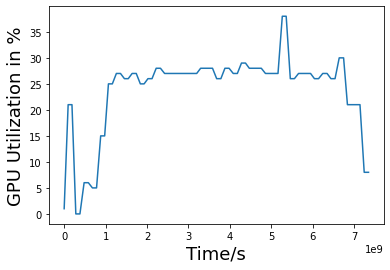

In [5]:
p = sns.lineplot(y='gpu_util', x="time", data=df)
p.set_xlabel("Time/s", fontsize = 18)
p.set_ylabel("GPU Utilization in %", fontsize = 18)

Text(0, 0.5, 'GPU Utilization in %')

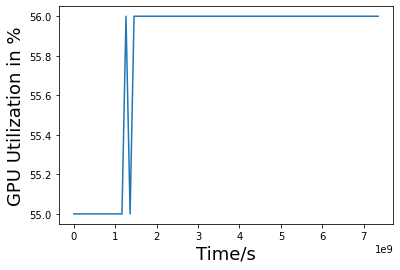

In [6]:
p = sns.lineplot(y='gpu_temp_C', x="time", data=df)
p.set_xlabel("Time/s", fontsize = 18)
p.set_ylabel("GPU Utilization in %", fontsize = 18)

Text(0, 0.5, 'GPU Powerdraw in W')

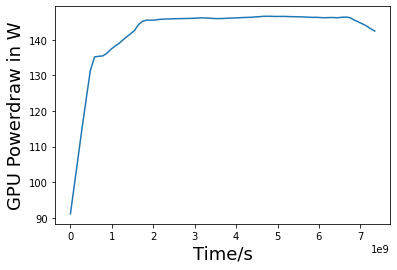

In [7]:
p = sns.lineplot(y='power_draw_W', x="time", data=df)
p.set_xlabel("Time/s", fontsize = 18)
p.set_ylabel("GPU Powerdraw in W", fontsize = 18)